In [3]:
import dte_adj
from dte_adj.plot import plot
import numpy as np
import matplotlib.pyplot as plt

In [291]:
def generate_data(n, d_x=100, rho=0.5):
    """
    Generate data according to the described data generating process (DGP).

    Args:
    n (int): Number of samples.
    d_x (int): Number of covariates. Default is 100.
    rho (float): Success probability for the Bernoulli distribution. Default is 0.5.

    Returns:
    X (np.ndarray): Covariates matrix of shape (n, d_x).
    D (np.ndarray): Treatment variable array of shape (n,).
    Y (np.ndarray): Outcome variable array of shape (n,).
    """
    # Generate covariates X from a uniform distribution on (0, 1)
    X = np.random.uniform(0, 1, (n, d_x))
    
    # Generate treatment variable D from a Bernoulli distribution with success probability rho
    D = np.random.binomial(1, rho, n)
    
    # Define beta_j and gamma_j according to the problem statement
    beta = np.zeros(d_x)
    gamma = np.zeros(d_x)
    
    # Set the first 50 values of beta and gamma to 1
    beta[:50] = 1
    gamma[:50] = 1
    
    # Compute the outcome Y
    U = np.random.normal(0, 1, n)  # Error term
    linear_term = np.dot(X, beta)
    quadratic_term = np.dot(X**2, gamma)
    
    # Outcome equation
    Y = D + linear_term + quadratic_term + U
    
    return X, D, Y


n = 100  # Sample size
X, D, Y = generate_data(n)

# Display the first few rows of the generated data
print("X (covariates):\n", X[:5])
print("D (treatment):\n", D[:5])
print("Y (outcome):\n", Y[:5])

X (covariates):
 [[0.41943441 0.33269379 0.61136156 0.1212182  0.34399426 0.35684426
  0.78452913 0.49105368 0.55648143 0.16285378 0.17836028 0.22303181
  0.93170834 0.11659135 0.92518203 0.84535681 0.64387966 0.84098964
  0.25557546 0.74924555 0.01471874 0.66685173 0.24561232 0.12315201
  0.51348549 0.71847546 0.57354425 0.28680909 0.20944136 0.88884736
  0.46327232 0.81550414 0.07089518 0.9510669  0.83364674 0.15086704
  0.63136744 0.30318266 0.57329868 0.83385888 0.18538866 0.75400681
  0.77221778 0.84349797 0.7989569  0.46948657 0.39744134 0.34673649
  0.79474879 0.60922495 0.60546523 0.70743905 0.84295144 0.11256069
  0.93762195 0.24701831 0.17349031 0.30164071 0.64907038 0.50257298
  0.66175554 0.75327169 0.89833178 0.97359806 0.99664707 0.30670812
  0.22429095 0.28243696 0.27610834 0.46545009 0.38349278 0.04254373
  0.9802916  0.02272844 0.83048401 0.04186157 0.00926536 0.58013364
  0.47542901 0.34793511 0.36793951 0.96216116 0.44320261 0.78359862
  0.15997903 0.92624291 0.24265

## Simple Estimator

In [292]:
estimator = dte_adj.SimpleDistributionEstimator()

In [293]:
estimator.fit(X, D, Y)

In [294]:
dte = estimator.predict_dte(0, 1, np.sort(Y[:100]), variance_type="uniform")

<Axes: >

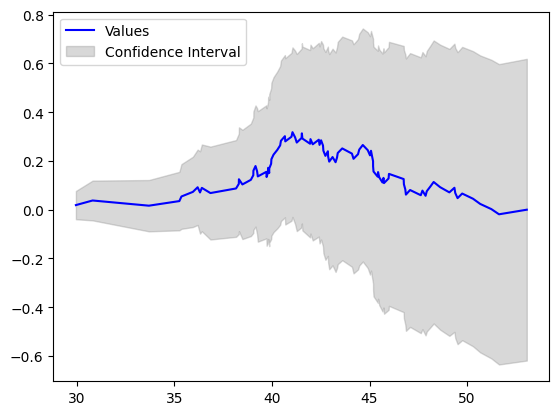

In [295]:
plot(np.sort(Y[:100]), dte[0], dte[1], dte[2])

<Axes: >

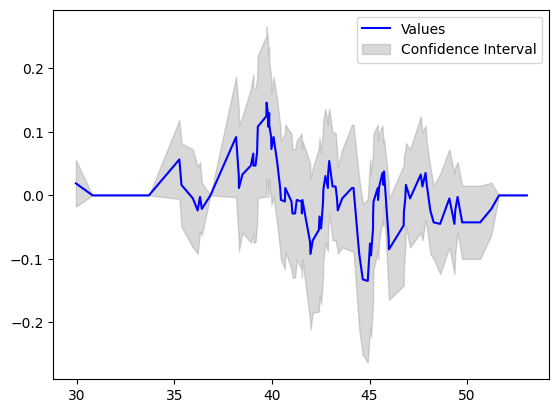

In [296]:
pte = estimator.predict_pte(0, 1, 1, np.sort(Y))
plot(np.sort(Y[:1000]), pte[0], pte[1], pte[2])

## Adjusted Estimator

In [297]:
from sklearn.linear_model import LogisticRegression

In [298]:
logit = LogisticRegression()

In [299]:
estimator = dte_adj.AdjustedDistributionEstimator(logit)

In [300]:
estimator.fit(X, D, Y)

<Axes: title={'center': 'analytic confidence band'}>

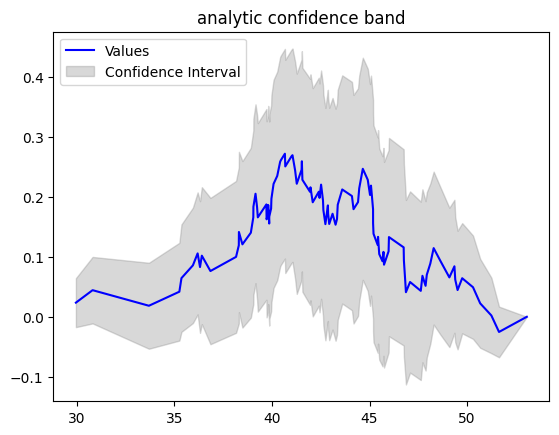

In [301]:
dte = estimator.predict_dte(0, 1, np.sort(Y), variance_type="analytic")
plot(np.sort(Y), dte[0], dte[1], dte[2], title="analytic confidence band")

<Axes: title={'center': 'pointwise confidence band'}>

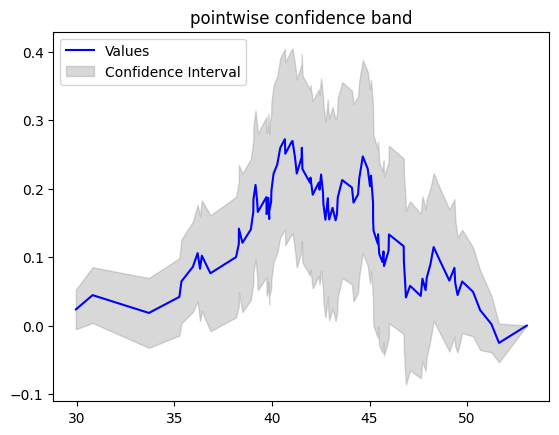

In [302]:
dte = estimator.predict_dte(0, 1, np.sort(Y), variance_type="pointwise")
plot(np.sort(Y), dte[0], dte[1], dte[2], title="pointwise confidence band")

<Axes: title={'center': 'uniform confidence band'}>

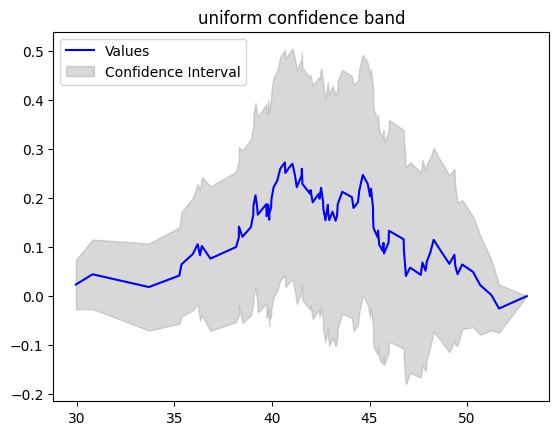

In [303]:
dte = estimator.predict_dte(0, 1, np.sort(Y), variance_type="uniform")
plot(np.sort(Y), dte[0], dte[1], dte[2], title="uniform confidence band")